In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris/Iris.csv
/kaggle/input/iris/database.sqlite


In [2]:
from sklearn.preprocessing import LabelEncoder

In [3]:
df= pd.read_csv('/kaggle/input/iris/Iris.csv')

In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
encoder = LabelEncoder()
df['Species'] = encoder.fit_transform(df['Species'])

In [6]:
df.sample(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
113,114,5.7,2.5,5.0,2.0,2
130,131,7.4,2.8,6.1,1.9,2
72,73,6.3,2.5,4.9,1.5,1
105,106,7.6,3.0,6.6,2.1,2
86,87,6.7,3.1,4.7,1.5,1


In [7]:
df.drop(df.columns[5],axis=1)
df.drop(df.columns[0],axis=1)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [8]:
df=df[['SepalLengthCm','PetalLengthCm','Species']]
df.head()

,SepalLengthCm,PetalLengthCm,Species
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0


In [9]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]
print(X)

     SepalLengthCm  PetalLengthCm
0              5.1            1.4
1              4.9            1.4
2              4.7            1.3
3              4.6            1.5
4              5.0            1.4
..             ...            ...
145            6.7            5.2
146            6.3            5.0
147            6.5            5.2
148            6.2            5.4
149            5.9            5.1

[150 rows x 2 columns]


In [10]:
print(y)

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64


# **Splitting and Training data**

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [13]:
clf = LogisticRegression(multi_class='multinomial')

the above function shows the softmax resression [multinomial parameter is passed to use this function]

In [14]:
clf.fit(X_train,y_train)

LogisticRegression(multi_class='multinomial')

In [15]:
y_pred= clf.predict(X_test)

# **Checking the classification matrix performance through accuracy and confusion matrix**

In [16]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [17]:
print(accuracy_score(y_test,y_pred))

0.9666666666666667


In [18]:
pd.DataFrame(confusion_matrix(y_test,y_pred))

,0,1,2
0,14,0,0
1,0,7,1
2,0,0,8


only 1 flower is wrongly predicted it belongs to class 1 but pred as 2


In [19]:
# taking some radom value for checking
sample = np.array([[8.3,2.7]])
clf.predict_proba(sample)

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[1.46719543e-01, 8.53160171e-01, 1.20286031e-04]])

In [20]:
clf.predict(sample)

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

# **Graph plotting**

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


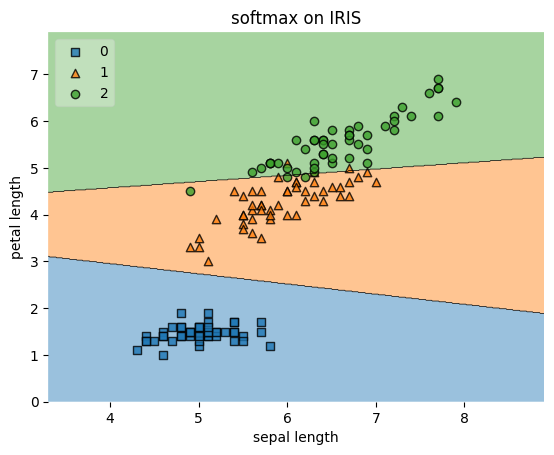

In [21]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
plot_decision_regions(X.values, y.values,clf,legend=2)
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.title('softmax on IRIS')
plt.show()